In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# mpg 데이터셋 불러오기
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


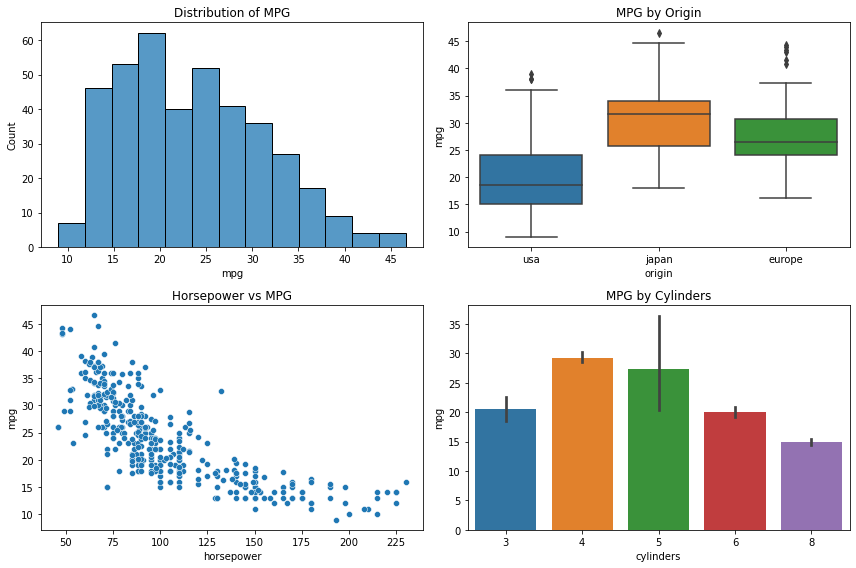

In [4]:
# 원본 데이터로 2x2 그래프 생성
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
plots = [
    {'func': sns.histplot, 'x': 'mpg', 'title': 'Distribution of MPG', 'ax': axs[0, 0]},
    {'func': sns.boxplot, 'x': 'origin', 'y': 'mpg', 'title': 'MPG by Origin', 'ax': axs[0, 1]},
    {'func': sns.scatterplot, 'x': 'horsepower', 'y': 'mpg', 'title': 'Horsepower vs MPG', 'ax': axs[1, 0]},
    {'func': sns.barplot, 'x': 'cylinders', 'y': 'mpg', 'title': 'MPG by Cylinders', 'ax': axs[1, 1]},
]

for plot in plots:
    plot['func'](data=df, x=plot.get('x'), y=plot.get('y', None), ax=plot['ax'])
    plot['ax'].set_title(plot['title'])

plt.tight_layout()
plt.show()

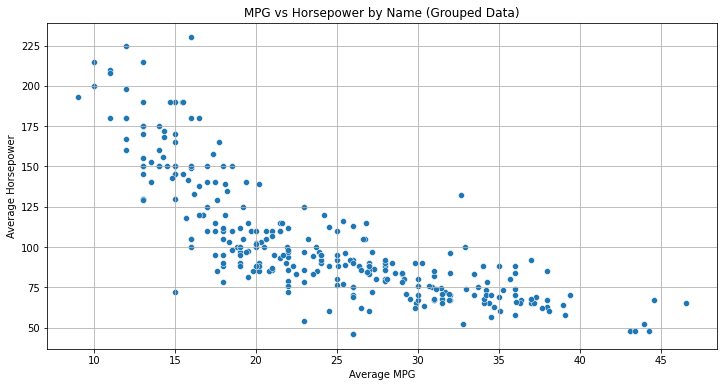

In [5]:
# name으로 그룹화한 데이터를 요약하고 시각화
# 결측값 처리
df = df.dropna(subset=['name', 'mpg', 'horsepower'])

# name으로 그룹화하고 평균값 계산
grouped_df = df.groupby('name').mean().reset_index()

# name에 대한 mpg와 horsepower 관계 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped_df, x='mpg', y='horsepower')
plt.title('MPG vs Horsepower by Name (Grouped Data)')
plt.xlabel('Average MPG')
plt.ylabel('Average Horsepower')
plt.grid()
plt.show()